# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean
    X_train_centered = X_train - np.mean(X_train, axis=0)

    # Compute SVD
    U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

    # Reduce the dimensionality by selecting top n_components
    U_reduced = U[:, :n_components]
    S_reduced = np.diag(S[:n_components])
    Vt_reduced = Vt[:n_components, :]

    # Project training and test data into reduced space
    X_train_svd = np.dot(U_reduced, S_reduced)
    X_test_centered = X_test - np.mean(X_test, axis=0)
    X_test_svd = np.dot(X_test_centered, Vt_reduced.T)

    return X_train_svd, X_test_svd


## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [6]:
svd_components = [10, 20, 50, 100, 200, 500, 784]  # Various SVD components

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train logistic regression and measure performance
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Append results for analysis
    results.append((n_components, accuracy, training_time))
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8041, Training time: 1.2567 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8786, Training time: 2.7969 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9082, Training time: 14.7382 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9173, Training time: 45.1506 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9208, Training time: 100.8013 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9211, Training time: 345.2018 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 571.9443 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


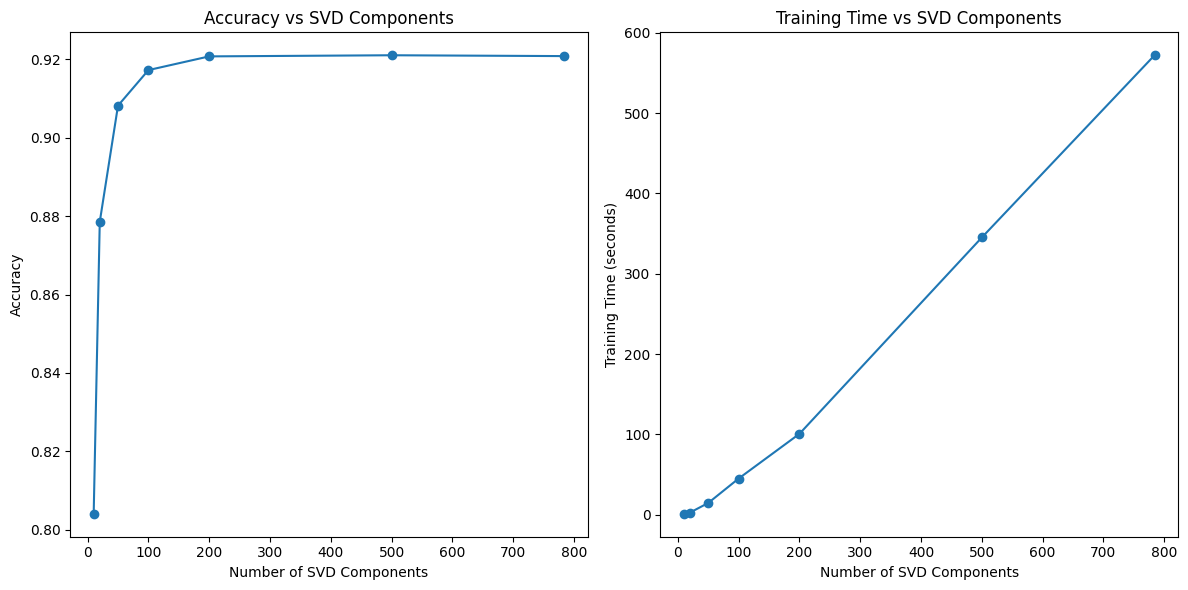

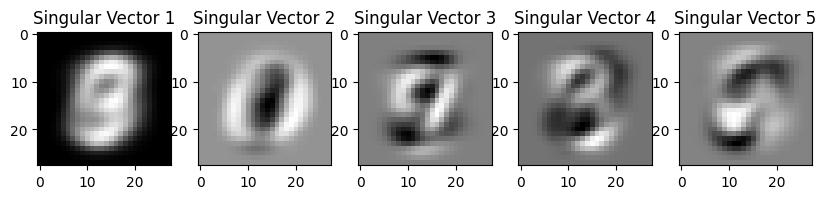

In [7]:
# Convert results into a format for plotting
components, accuracies, training_times = zip(*results)

# Plot the results
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

# Training time plot
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o')
plt.title('Training Time vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
top_singular_vectors = Vt[:5, :]

# Reshape and plot top singular vectors as images
fig, axs = plt.subplots(1, 5, figsize=(10, 4))
for i, vec in enumerate(top_singular_vectors):
    axs[i].imshow(vec.reshape(28, 28), cmap='gray')
    axs[i].set_title(f"Singular Vector {i+1}")
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:




#### 1. **Accuracy vs. SVD Components:**
   The graph clearly shows that the accuracy improves rapidly when increasing the number of SVD components from 10 to around 100. The accuracy starts from approximately 0.80 at 10 components, jumps to around 0.92 at around 100 components, and then plateaus. Beyond 100 components, further increases in the number of SVD components do not result in significant gains in accuracy. The model achieves its peak accuracy (~0.92) at around 100 components and does not improve much further, even up to 784 components.

   For accuracy, the optimal number of SVD components lies around 100. Using more than 100 components does not significantly improve the model’s performance.

#### 2. **Training Time vs. SVD Components:**
   Training time increases almost linearly as the number of SVD components increases. With 10 components, the training time is minimal (a few seconds), while for 100 components, it starts to increase considerably. At 400 components, the training time is already over 100 seconds, and it increases drastically to around 600 seconds for 784 components.

   The training time increases significantly with higher components. If efficiency is a priority, then keeping the number of SVD components lower (e.g., around 100) would strike a good balance between accuracy and training time.

#### 3. **Singular Vector Visualization:**
   The first 5 singular vectors capture the main features of the digits in the MNIST dataset. Singular vectors 1, 2, 3, and 4 resemble recognizable digit structures, such as 3, 0, 7, and 2, which align with the most common digits in the dataset. These top singular vectors capture the most significant patterns in the data, helping the logistic regression classifier differentiate between digit classes.

   The top singular vectors represent key features of the dataset. As a result, even using a smaller number of components (~100) retains the essential information required to achieve high classification accuracy.

### Conclusion:

Based on the results, the number of SVD components that looks best is around 100 components. The accuracy plateaus at around 100 components, and after this point, increasing the number of components does not significantly improve the accuracy. However, training time increases substantially as the number of components increases. Singular vectors show that the most important digit features are captured with fewer components, further supporting the choice of using 100 components for this task. Therefore, using 100 components strikes a good balance between high accuracy and reasonable training time, making it the optimal choice for this task.